# Mob App Studio Code

## Part I: Analysis & Preparing Data

Dataset dimension:
(10841, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0 

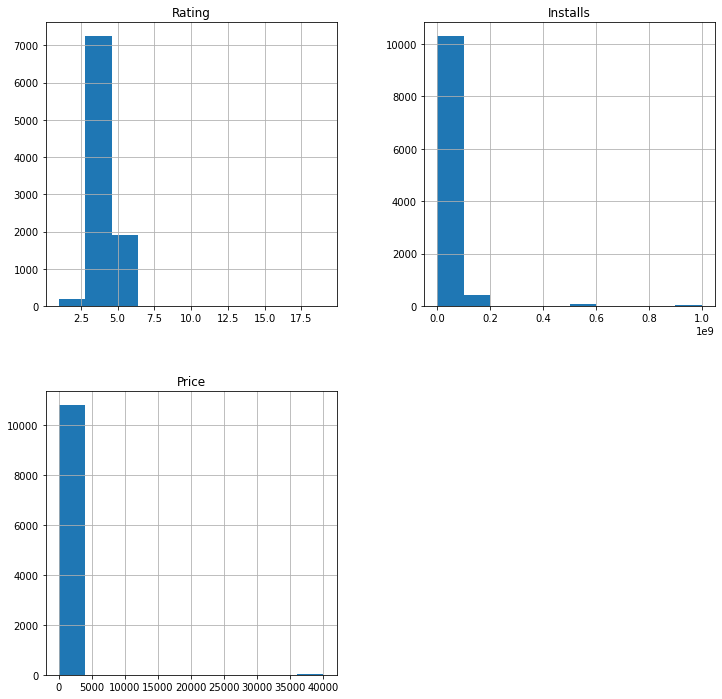

Scatter Matrix


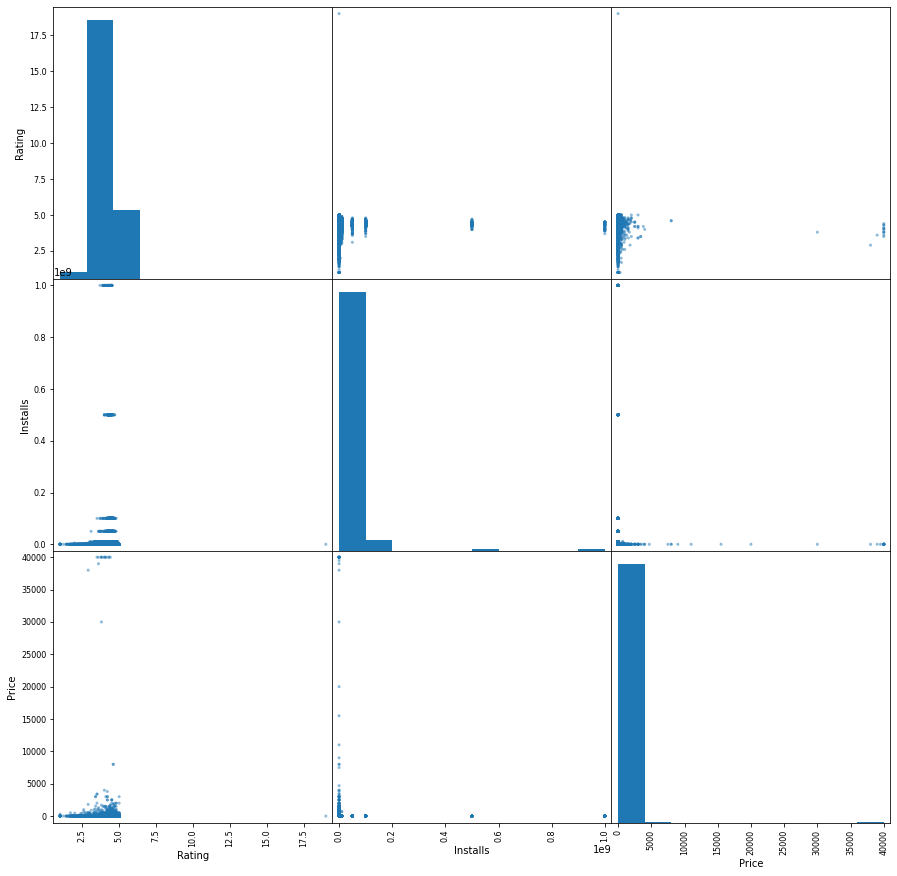

In [11]:
import pandas as pd
import zipfile
import matplotlib.pyplot as mp
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

def load_dataset():
    url = "googleplaystore.csv"
    dataset = pd.read_csv(url)
    
    return dataset

dataframe = load_dataset()

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print()
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(dataframe)

def clean_dataset(dataset):
    
    dataset['Installs'] = dataset['Installs'].str.replace(',', '', regex = False).str.replace('+', '', regex = False).str.replace('Free', '0', regex = False).astype(int)
    dataset['Price'] = dataset['Price'].str.replace('.', '', regex = False).str.replace('Everyone', '0', regex = False).str.replace('$', '', regex = False).astype(int)
    
    return dataset.dropna()

clean_dataset(dataframe)


def print_histograms(dataset):
    print()
    print("Histogram")
    dataset.hist(figsize=(12, 12))
    plt.show()

print_histograms(dataframe)

def compute_correlations_matrix(dataset):
    corrM = dataset.corr(method = 'pearson')
    return corrM
   
def print_scatter_matrix(dataset):
    print("Scatter Matrix")
    scatter_matrix(dataset, figsize=(15, 15))
    plt.show()

print_scatter_matrix(dataframe)

## Part II: Displaying Main Notes

### The most popular paid apps of Family category

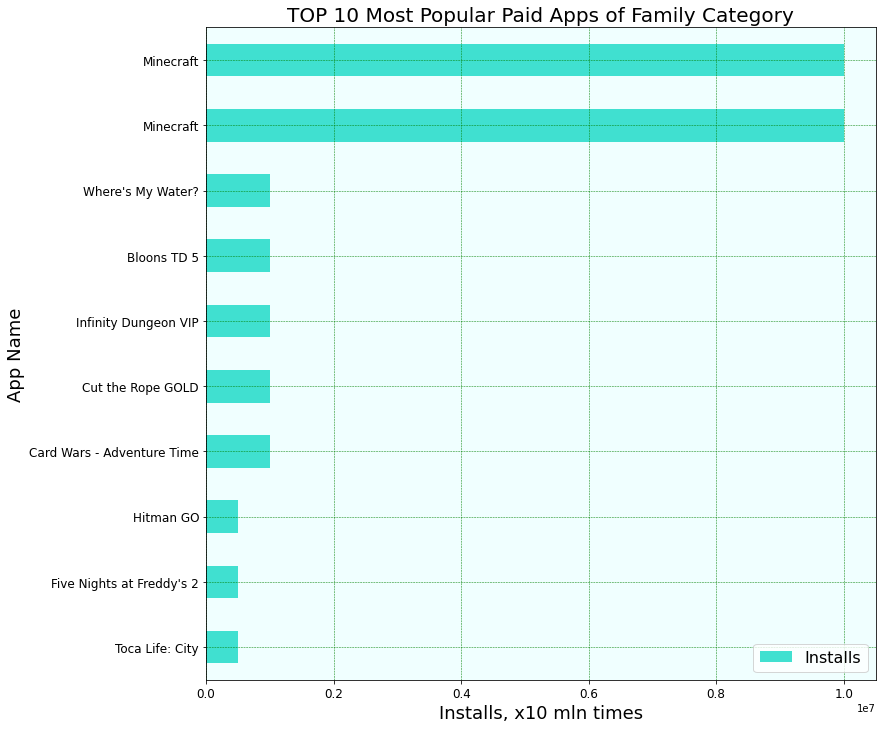

In [12]:
def plot_bar_diagram_popular_apps_family_cat(dataset):
   
    dataset_new = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid')]
    top_10_installs = dataset_new.nlargest(10, "Installs")
    df_sorted = top_10_installs.sort_values('Installs')
   
    #horizontal bar diagram
    ax = df_sorted.plot.barh(x = 'App', y = 'Installs', rot = 0, color = 'turquoise', figsize=(12, 12), fontsize = 12)
    ax.set_facecolor("azure") #background color
    
    plt.title("TOP 10 Most Popular Paid Apps of Family Category", fontsize = 20)
    plt.xlabel("Installs, x10 mln times", fontsize = 18)
    plt.ylabel("App Name", fontsize = 18)
    
    plt.legend(fontsize=16)
    
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

    
plot_bar_diagram_popular_apps_family_cat(dataframe)

### The most popular genres according to the number of installations from paid family

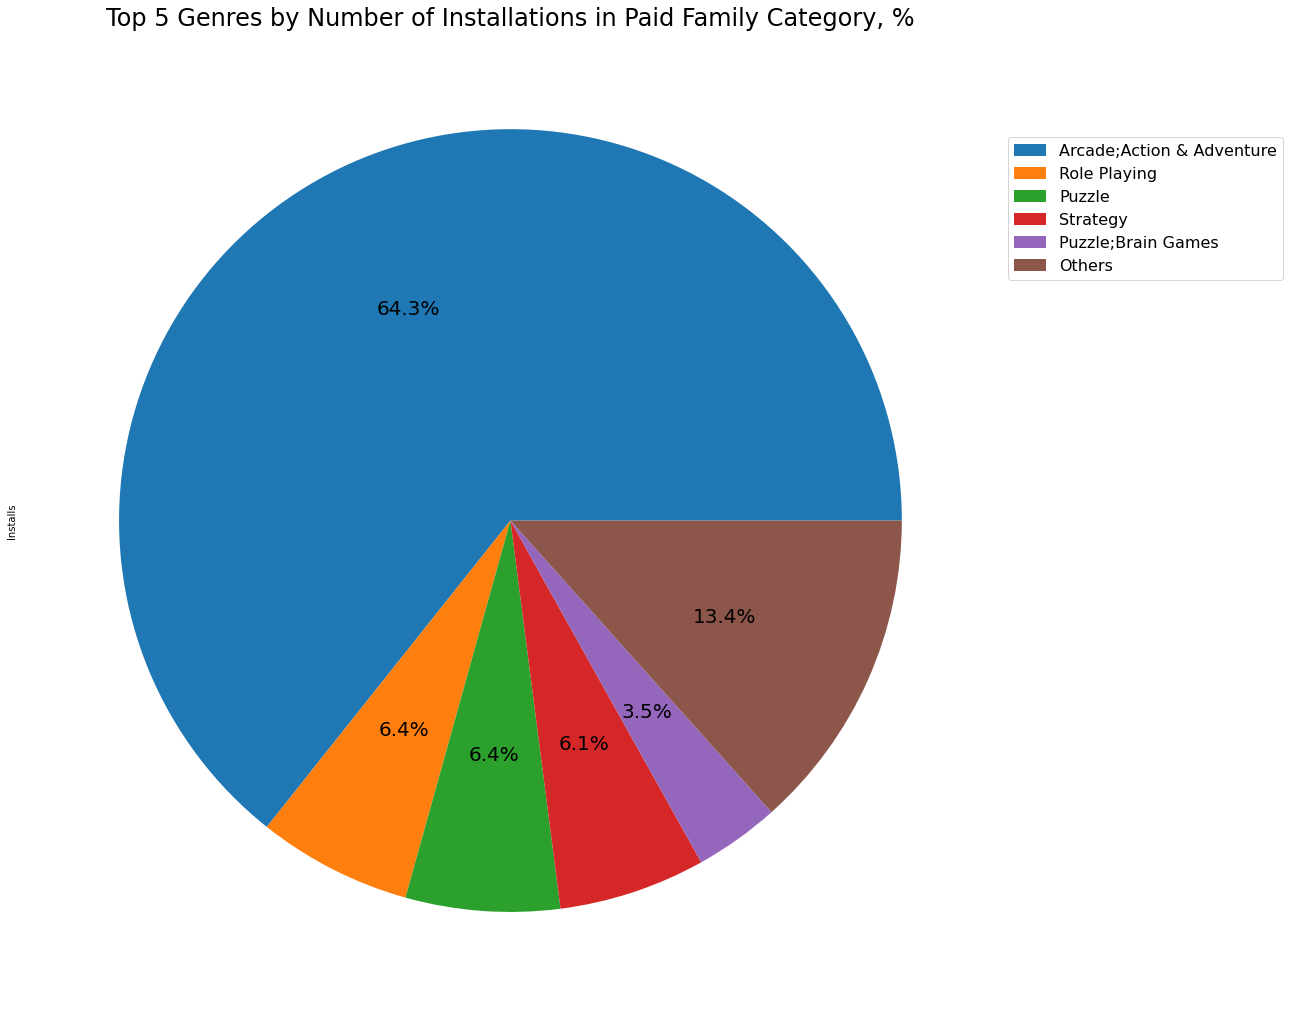

In [13]:
def pie_diagram_popular_genres_paid_family_cat(dataset):
   
    dataset_new = dataset.loc[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid')]
    df_genres = dataset_new.groupby(['Genres'])['Installs'].sum().sort_values(ascending = False).to_frame('Installs').reset_index() 
    
    #the top 5
    df2 = df_genres[:5].copy()
    
    #others
    new_row = pd.DataFrame(data = {
    'Genres' : ['Others'],
    'Installs' : [df_genres['Installs'][5:].sum()]
    })
    
    #combining top 5 with others
    df2 = pd.concat([df2, new_row])
    
    #plotting
    
    ax = df2.plot.pie(y = 'Installs', labels = None, autopct = '%1.1f%%', figsize = (18, 18), fontsize = 20)
    
    plt.title('Top 5 Genres by Number of Installations in Paid Family Category, %', fontsize = 24)
    plt.legend(fontsize=16, bbox_to_anchor = (1.0, 0.9), labels = df2['Genres']) #labels depends on groupby table, check it
    
    plt.show()
    
pie_diagram_popular_genres_paid_family_cat(dataframe)

### An array with the number of installation per category

In [14]:
def num_of_inst_per_cat_array(dataset):
    df = dataset.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).to_frame('Installs_sum_per_Category').reset_index() 
    #to.frame.reset_index() - adding new column to groupby pandas table
    
    arr = df.to_numpy()
    
    print("Array with the Number of Installations per Category, times (sorted by Installations)")
    print(arr)
    
num_of_inst_per_cat_array(dataframe)

Array with the Number of Installations per Category, times (sorted by Installations)
[['GAME' 35086024415]
 ['COMMUNICATION' 32647276251]
 ['PRODUCTIVITY' 14176091369]
 ['SOCIAL' 14069867902]
 ['TOOLS' 11452771915]
 ['FAMILY' 10258263505]
 ['PHOTOGRAPHY' 10088247655]
 ['NEWS_AND_MAGAZINES' 7496317760]
 ['TRAVEL_AND_LOCAL' 6868887146]
 ['VIDEO_PLAYERS' 6222002720]
 ['SHOPPING' 3247848785]
 ['ENTERTAINMENT' 2869160000]
 ['PERSONALIZATION' 2325494782]
 ['BOOKS_AND_REFERENCE' 1921469576]
 ['SPORTS' 1751174498]
 ['HEALTH_AND_FITNESS' 1583072512]
 ['BUSINESS' 1001914865]
 ['FINANCE' 876648734]
 ['EDUCATION' 871452000]
 ['MAPS_AND_NAVIGATION' 724281890]
 ['LIFESTYLE' 537643539]
 ['WEATHER' 426100520]
 ['FOOD_AND_DRINK' 273898751]
 ['DATING' 264310807]
 ['HOUSE_AND_HOME' 168712461]
 ['ART_AND_DESIGN' 124338100]
 ['LIBRARIES_AND_DEMO' 62995910]
 ['COMICS' 56086150]
 ['MEDICAL' 53257437]
 ['AUTO_AND_VEHICLES' 53130211]
 ['PARENTING' 31521110]
 ['BEAUTY' 27197050]
 ['EVENTS' 15973161]
 ['1.9' 0]]

### A pie with the number of installation per category

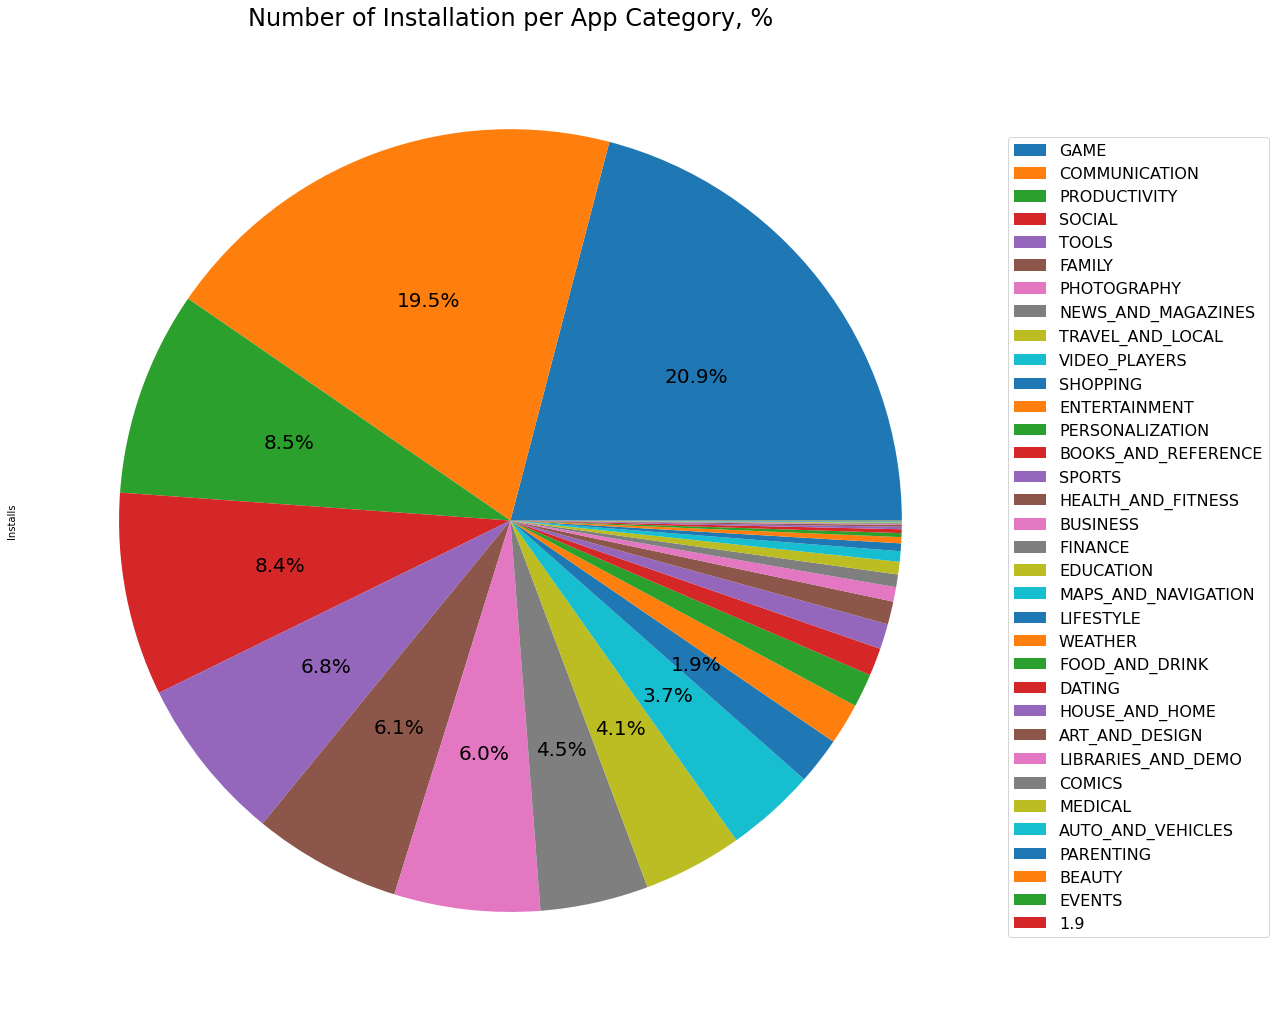

In [15]:
def pie_number_of_inst_per_cat(dataset):
    
    df_groups = dataset.groupby(['Category'])['Installs'].sum().sort_values(ascending = False)
    
    def autopct(pct): # only show the label when it's > 1.9%
        return ('%1.1f%%' % pct) if pct > 1.9 else ''
    
    ax = df_groups.plot.pie(labels = None, autopct = autopct, figsize = (18, 18), fontsize = 20)
    
    plt.title('Number of Installation per App Category, %', fontsize = 24)
    
    plt.legend(fontsize=16, bbox_to_anchor = (1.0, 0.9), labels = df_groups.index)
    
    plt.show()
    
pie_number_of_inst_per_cat(dataframe)

### A bar with the mean price per category

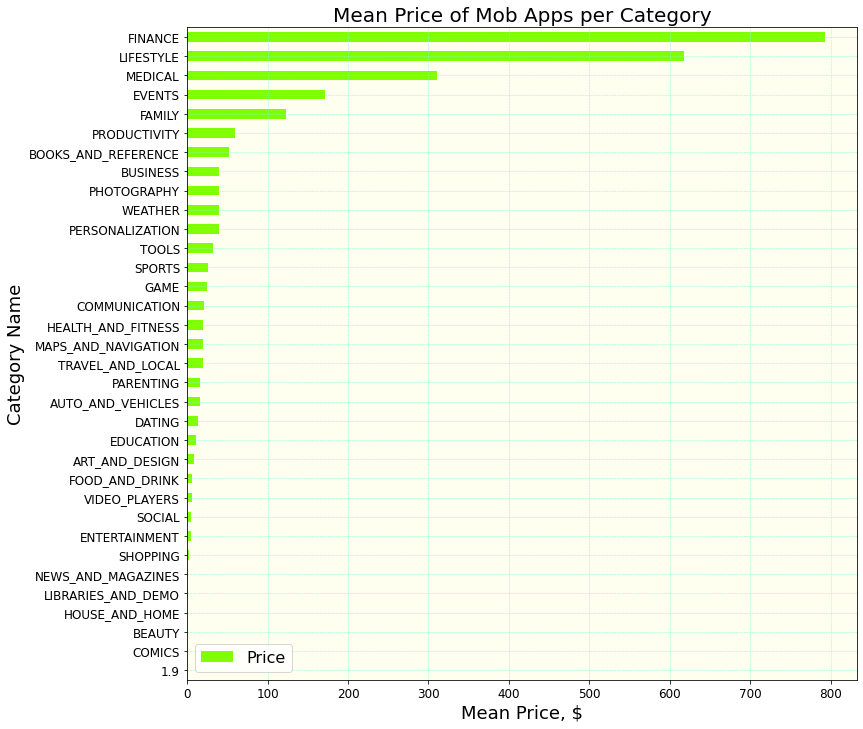

In [16]:
def bar_mean_price_per_category(dataset):
    
    df_groups = dataset.groupby(['Category'])['Price'].mean().sort_values(ascending = True)
    
    #create bar plot by group
    ax = df_groups.plot.barh(color = 'chartreuse', figsize = (12, 12), fontsize = 12)
    ax.set_facecolor("ivory") #background color
   
    plt.title('Mean Price of Mob Apps per Category', fontsize = 20)
    plt.xlabel('Mean Price, $', fontsize = 18)
    plt.ylabel('Category Name', fontsize = 18)
    
    plt.legend(fontsize=16)
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.show()

bar_mean_price_per_category(dataframe)

### Most expensive apps per category

In [17]:
def most_expensive_app_per_cat(dataset):
    
    dataset_new = dataset.loc[(dataset['Type'] == 'Paid')]
    
    df1 = dataset_new.groupby('Category')[['App', 'Price']].max().sort_values(["Price"], ascending = False)
    
    print(df1)
    
most_expensive_app_per_cat(dataframe)

                                                                   App  Price
Category                                                                     
LIFESTYLE                                                   💎 I'm rich  40000
FINANCE                                                         amm dz  39999
FAMILY                                                    ¡Ay Caramba!  39999
MEDICAL                                       palmPEDi: Pediatric Tape  20000
PRODUCTIVITY                                                    myGrow  15499
EVENTS                                         BP Fitness Lead Scanner  10999
BUSINESS                 TurboScan: scan documents and receipts in PDF   8999
SPORTS                                                      iHunter BC   2999
PHOTOGRAPHY                                                  Pocket AC   2999
TOOLS                                    iCam - Webcam Video Streaming   2599
COMMUNICATION                                  pretty Easy priva